<a href="https://colab.research.google.com/github/johnsDevassy/Worked_Projects/blob/master/Ecg_from__mit_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#loading modules

https://www.kaggle.com/shayanfazeli/heartbeat/download

In [ ]:
from zipfile import ZipFile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample
from keras.models import Model, load_model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
zip=ZipFile('/content/drive/MyDrive/datasets/archive(1).zip','r')
zip.extractall()

#Load csv file

In [ ]:
lst=[str(i) for i in range(0,188)]

In [ ]:
mit_traindf=pd.read_csv('/content/mitbih_train.csv',names=lst)
mit_testdf=pd.read_csv('/content/mitbih_test.csv',names=lst)
ptdb_abnormal=pd.read_csv('/content/ptbdb_abnormal.csv',header=None)
ptdb_normal=pd.read_csv('/content/ptbdb_normal.csv',header=None)

In [ ]:
mit_traindf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mit_traindf.iloc[[0]]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.04902,0.044118,0.061275,0.066176,0.061275,0.04902,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.07598,0.093137,0.105392,0.115196,0.102941,0.117647,0.125,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ptdb_abnormal.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,0.649870,0.635100,0.655083,0.664639,0.633362,0.746308,0.871416,0.938314,1.000000,0.948740,0.396177,0.000000,0.039096,0.128584,0.305821,0.640313,0.617724,0.537793,0.352737,0.220678,0.256299,0.357950,0.482189,0.570808,0.577758,0.620330,0.622068,0.618593,0.626412,0.612511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,0.125101,0.129136,0.137207,0.137207,0.132365,0.126715,0.158192,0.152542,0.132365,0.168684,0.156578,0.183212,0.191283,0.204197,0.230024,0.244552,0.285714,0.307506,0.321227,0.327684,0.351897,0.373688,0.397094,0.363196,0.340597,0.307506,0.258273,0.197740,0.199354,0.173527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,0.681260,0.616743,0.624424,0.619816,0.596006,0.627496,0.631336,0.619048,0.612903,0.613671,0.607527,0.586790,0.568356,0.543779,0.526882,0.552995,0.577573,0.592166,0.576037,0.579109,0.573733,0.589862,0.542243,0.519201,0.514593,0.528418,0.493856,0.485407,0.461598,0.478495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,0.357671,0.379852,0.375231,0.397412,0.388170,0.378004,0.398336,0.419593,0.427911,0.402033,0.378928,0.400185,0.406654,0.422366,0.402033,0.383549,0.398336,0.393715,0.417745,0.388170,0.360444,0.402957,0.392791,0.413124,0.377079,0.327172,0.346580,0.338262,0.356747,0.314233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,0.285566,0.343718,0.281412,0.281412,0.283489,0.281412,0.319834,0.311526,0.283489,0.278297,0.274143,0.317757,0.267913,0.275182,0.280374,0.255452,0.313603,0.266874,0.244029,0.198339,0.192108,0.190031,0.134995,0.086189,0.078920,0.036345,0.024922,0.000000,0.044652,0.024922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
mit_traindf.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,0.198778,0.203550,0.208776,0.212885,0.218393,0.224966,0.231377,0.237123,0.242582,0.247923,0.253749,0.259748,0.266244,0.272734,0.279355,0.285588,0.291808,0.297672,0.303384,0.308795,0.313890,0.318454,0.322087,0.324891,0.326737,0.327817,0.327931,0.326746,0.324326,0.320537,...,0.030729,0.029582,0.028531,0.027573,0.026875,0.025771,0.024823,0.023932,0.023060,0.022458,0.021809,0.021245,0.020623,0.020026,0.019534,0.019053,0.018592,0.017664,0.016740,0.015722,0.014402,0.013024,0.011625,0.010262,0.008929,0.008056,0.007278,0.006531,0.005981,0.005479,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,0.171796,0.176496,0.180274,0.184101,0.186963,0.190002,0.193899,0.198465,0.202855,0.207166,0.211187,0.214821,0.218450,0.221486,0.224031,0.225848,0.227133,0.227830,0.228436,0.228871,0.228760,0.228393,0.227472,0.226180,0.224659,0.223110,0.221352,0.219258,0.216884,0.214168,...,0.116516,0.114463,0.112686,0.111103,0.110513,0.108566,0.106493,0.104591,0.102658,0.101395,0.100201,0.099386,0.098327,0.096635,0.095729,0.095368,0.095055,0.092902,0.091118,0.088574,0.084638,0.079949,0.075307,0.069892,0.063994,0.060074,0.056404,0.052840,0.050006,0.046693,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,0.070543,0.069182,0.068293,0.067744,0.070175,0.072993,0.074803,0.075972,0.076923,0.077872,0.079442,0.081911,0.085938,0.090032,0.094595,0.098901,0.103960,0.109348,0.114754,0.120730,0.127946,0.135962,0.144295,0.151852,0.157895,0.161035,0.161133,0.159383,0.157343,0.155388,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [ ]:
mit_traindf.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '178', '179', '180', '181', '182', '183', '184', '185', '186', '187'],
      dtype='object', length=188)

In [ ]:
mit_traindf[mit_traindf.isna().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187


#get the classes

In [ ]:
mit_traindf[mit_traindf.columns[-1]].unique()

array([0., 1., 2., 3., 4.])

In [ ]:
mit_traindf.iloc[:,-1:]

,187
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
87549,4.0
87550,4.0
87551,4.0
87552,4.0


In [ ]:
mit_traindf[mit_traindf.columns[-1]].value_counts().to_frame().style.bar()

,187
0.0,72471
4.0,6431
2.0,5788
1.0,2223
3.0,641


 Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

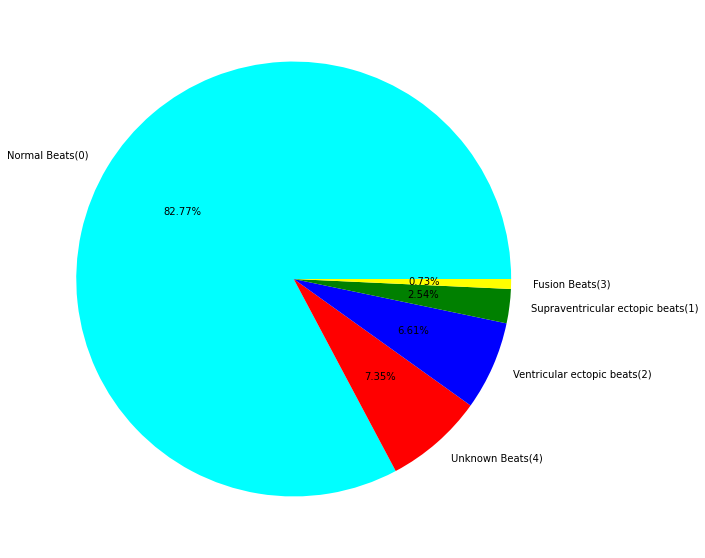

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(mit_traindf[mit_traindf.columns[-1]].value_counts(),
        labels=['Normal Beats(0)','Unknown Beats(4)','Ventricular ectopic beats(2)','Supraventricular ectopic beats(1)','Fusion Beats(3)'],
        autopct="%.2f%%", colors=['cyan','red','blue','green','yellow'],
        )
plt.show()

**Inequality leads to big Problems maybe war**

#lets plots some

Now let us plot some ecg graphs

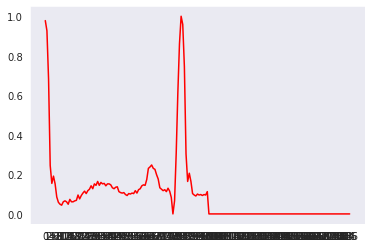

In [ ]:
sns.set_style('dark')
plt.plot(mit_traindf.iloc[0, 0:187], color = 'red')
plt.show()

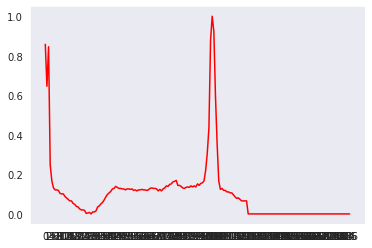

In [ ]:
plt.plot(mit_traindf.iloc[87552, 0:187], color = 'red')
plt.show()

**Lets Understand the difference between some types of ecgs**

        labels=['Normal Beats(0)','Unknown Beats(4)','Ventricular ectopic beats(2)','Supraventricular ectopic beats(1)','Fusion Beats(3)'],


In [ ]:
norm_1=mit_traindf[mit_traindf['187']==0].iloc[[0]]
fuss_1=mit_traindf[mit_traindf['187']==3].iloc[[0]]
unkn_1=mit_traindf[mit_traindf['187']==4].iloc[[0]]
vent_1=mit_traindf[mit_traindf['187']==2].iloc[[0]]
supr_1=mit_traindf[mit_traindf['187']==1].iloc[[0]]


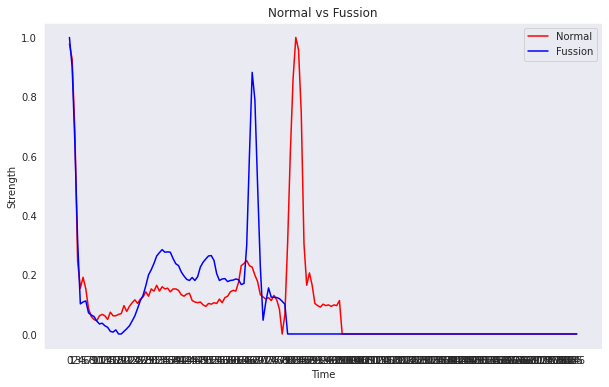

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(norm_1.iloc[0,0:187], color = 'red',label='Normal')
plt.plot(fuss_1.iloc[0,0:187], color = 'blue',label='Fussion')
plt.title("Normal vs Fussion", fontsize = 12)
plt.xlabel("Time")
plt.ylabel("Strength")
plt.legend()
plt.show()

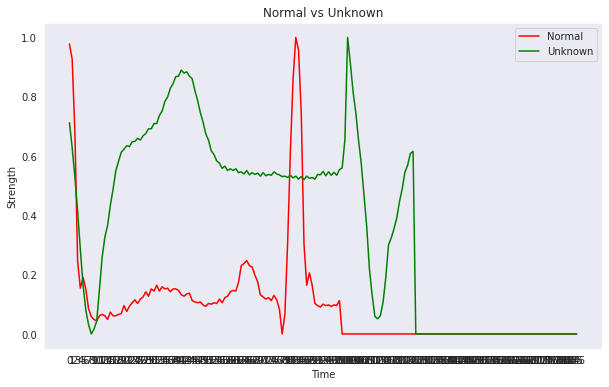

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(norm_1.iloc[0,0:187], color = 'red',label='Normal')
plt.plot(unkn_1.iloc[0,0:187], color = 'Green',label='Unknown')
plt.title("Normal vs Unknown", fontsize = 12)
plt.xlabel("Time")
plt.ylabel("Strength")
plt.legend()
plt.show()

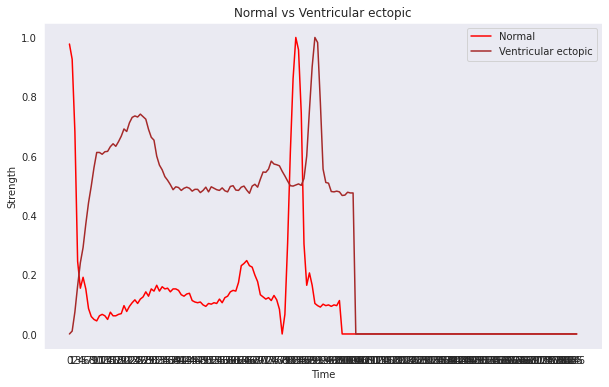

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(norm_1.iloc[0,0:187], color = 'red',label='Normal')
plt.plot(vent_1.iloc[0,0:187], color = 'Brown',label='Ventricular ectopic')
plt.title("Normal vs Ventricular ectopic", fontsize = 12)
plt.xlabel("Time")
plt.ylabel("Strength")
plt.legend()
plt.show()

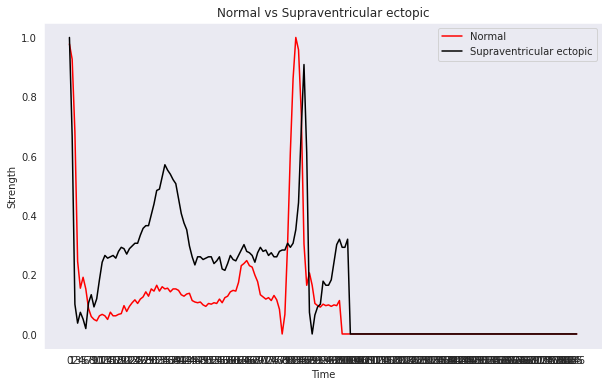

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(norm_1.iloc[0,0:187], color = 'red',label='Normal')
plt.plot(supr_1.iloc[0,0:187], color = 'Black',label='Supraventricular ectopic')
plt.title("Normal vs Supraventricular ectopic", fontsize = 12)
plt.xlabel("Time")
plt.ylabel("Strength")
plt.legend()
plt.show()

Noisy isn't it  :)

#seperating DataFrame

Lets make seperate set of dataframes cause we have oversample it

In [ ]:
mit_traindf['187']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: 187, Length: 87554, dtype: float64

In [ ]:
set_0=mit_traindf[mit_traindf['187']==0]
set_1=mit_traindf[mit_traindf['187']==1]
set_2=mit_traindf[mit_traindf['187']==2]
set_3=mit_traindf[mit_traindf['187']==3]
set_4=mit_traindf[mit_traindf['187']==4]

In [ ]:
print(set_1['0'].count(),
set_2['0'].count(),
set_3['0'].count(),
set_4['0'].count(),
set_0['0'].count())

2223 5788 641 6431 72471


0.0 =  	72471

4.0   =	6431

2.0 =	5788

1.0 =	2223

3.0 =	641

#Oversampling and undersampling

Lets do oversampling for 1,2,3,4

In [ ]:
set_0_samp=resample(set_0,n_samples=15000,replace=False,random_state=100)
set_1_samp=resample(set_1,n_samples=15000,replace=True,random_state=100)
set_2_samp=resample(set_2,n_samples=15000,replace=True,random_state=100)
set_3_samp=resample(set_3,n_samples=15000,replace=True,random_state=100)
set_4_samp=resample(set_4,n_samples=15000,replace=True,random_state=100)


In [ ]:
set_0_samp['0'].count()

15000

#Lets Make Train set and Test set

In [ ]:
train=pd.concat([set_0_samp,set_1_samp,set_2_samp,set_3_samp,set_4_samp])

In [ ]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,...,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.00000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,0.840926,0.736759,0.481782,0.314012,0.273174,0.264839,0.248924,0.236055,0.222936,0.203925,0.194465,0.198550,0.207683,0.215088,0.222854,0.233534,0.243673,0.251356,0.257736,0.264023,0.271150,0.279034,0.287303,0.296545,0.306119,0.315844,0.324824,0.334137,0.343113,0.351725,0.359666,0.367177,0.373019,0.378191,0.381488,0.383653,0.384127,0.382511,0.378649,0.373414,...,0.034238,0.033223,0.032493,0.031866,0.031397,0.030927,0.030286,0.029723,0.029599,0.028975,0.02825,0.027579,0.026648,0.026018,0.025301,0.024758,0.024668,0.023614,0.022679,0.021824,0.020900,0.019881,0.019002,0.018218,0.017301,0.016632,0.015996,0.015434,0.014923,0.014457,0.013859,0.013441,0.012896,0.012239,0.011805,0.011419,0.011022,0.010621,0.010412,2.000000
std,0.280766,0.262735,0.251840,0.252235,0.225772,0.207400,0.202104,0.190268,0.173692,0.164755,0.170588,0.179294,0.187581,0.195954,0.200100,0.204125,0.210167,0.217256,0.223866,0.229870,0.234828,0.239157,0.242852,0.246036,0.248517,0.249952,0.250117,0.248946,0.247842,0.246817,0.245722,0.245069,0.245042,0.244841,0.244590,0.243929,0.242844,0.240487,0.236964,0.233140,...,0.119172,0.117571,0.116616,0.115421,0.116118,0.116084,0.114771,0.114477,0.114925,0.113178,0.11241,0.111049,0.107557,0.105818,0.104021,0.103496,0.104167,0.101330,0.098843,0.096689,0.093989,0.090619,0.089744,0.087554,0.083895,0.081186,0.079745,0.078352,0.076205,0.073987,0.072212,0.071741,0.069776,0.068010,0.066980,0.065460,0.063275,0.061780,0.061329,1.414223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.828261,0.615668,0.282051,0.101224,0.106383,0.117725,0.101852,0.091667,0.086598,0.084305,0.076125,0.069098,0.064744,0.063750,0.067511,0.071749,0.072917,0.070281,0.067708,0.067416,0.067642,0.071429,0.079131,0.089844,0.100418,0.111111,0.120232,0.129496,0.135965,0.145833,0.155881,0.164875,0.170290,0.176583,0.180791,0.183471,0.186111,0.187681,0.189189,0.190748,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0

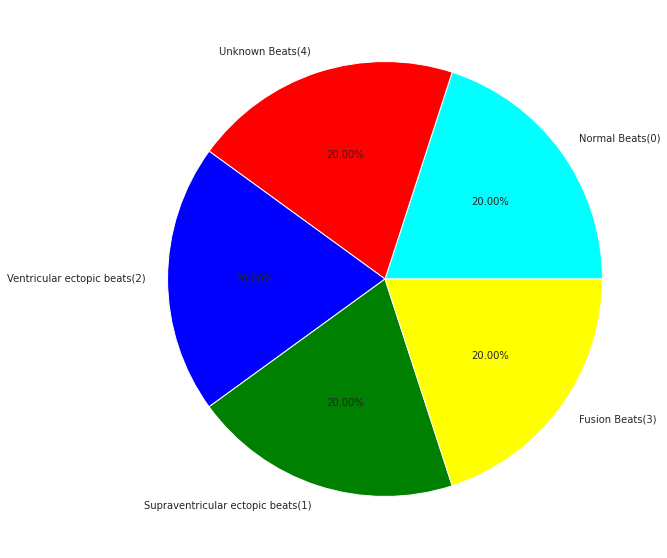

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(train['187'].value_counts(),
        labels=['Normal Beats(0)','Unknown Beats(4)','Ventricular ectopic beats(2)','Supraventricular ectopic beats(1)','Fusion Beats(3)'],
        autopct="%.2f%%", colors=['cyan','red','blue','green','yellow'],
        )
plt.show()

**EUREKKA**

#Train and Test Split

In [ ]:
train_y=train['187']
test_y=mit_testdf['187']
train_x=train.iloc[:,:-1].values
test_x=mit_testdf.iloc[:,:-1].values

In [ ]:
train_y=to_categorical(train_y)
test_y=to_categorical(test_y)

In [ ]:
np.unique(train_y,axis=0)

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
test_x.shape

(21892, 187)

In [ ]:
train_x=np.reshape(train_x,(75000,187,1))
test_x=np.reshape(test_x,(len(test_x),187,1))

In [ ]:
train_x.shape,test_x.shape

((75000, 187, 1), (21892, 187, 1))

#Model creation

In [ ]:
dim1=75000
dim2=187
dim3=1
input = Input((dim2, dim3))
c1=Conv1D(32,3,activation='relu',padding='same')(input)
b1=BatchNormalization()(c1)
m1=MaxPooling1D(3,2,padding='same')(b1)

c2=Conv1D(64,3,activation='relu',padding='same')(m1)
b2=BatchNormalization()(c2)
m2=MaxPooling1D(3,2,padding='same')(b2)

c3=Conv1D(128,3,activation='relu',padding='same')(m2)
b3=BatchNormalization()(c3)
m3=MaxPooling1D(3,2,padding='same')(b3)

f1=Flatten()(m3)

d1=Dense(128,activation='relu')(f1)

d2=Dense(64,activation='relu')(d1)

output=Dense(5,activation='softmax')(d2)

model=Model(inputs=[input],outputs=[output])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 187, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 187, 32)           128       
_________________________________________________________________
batch_normalization (BatchNo (None, 187, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 94, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 94, 64)            6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 94, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 47, 64)            0     

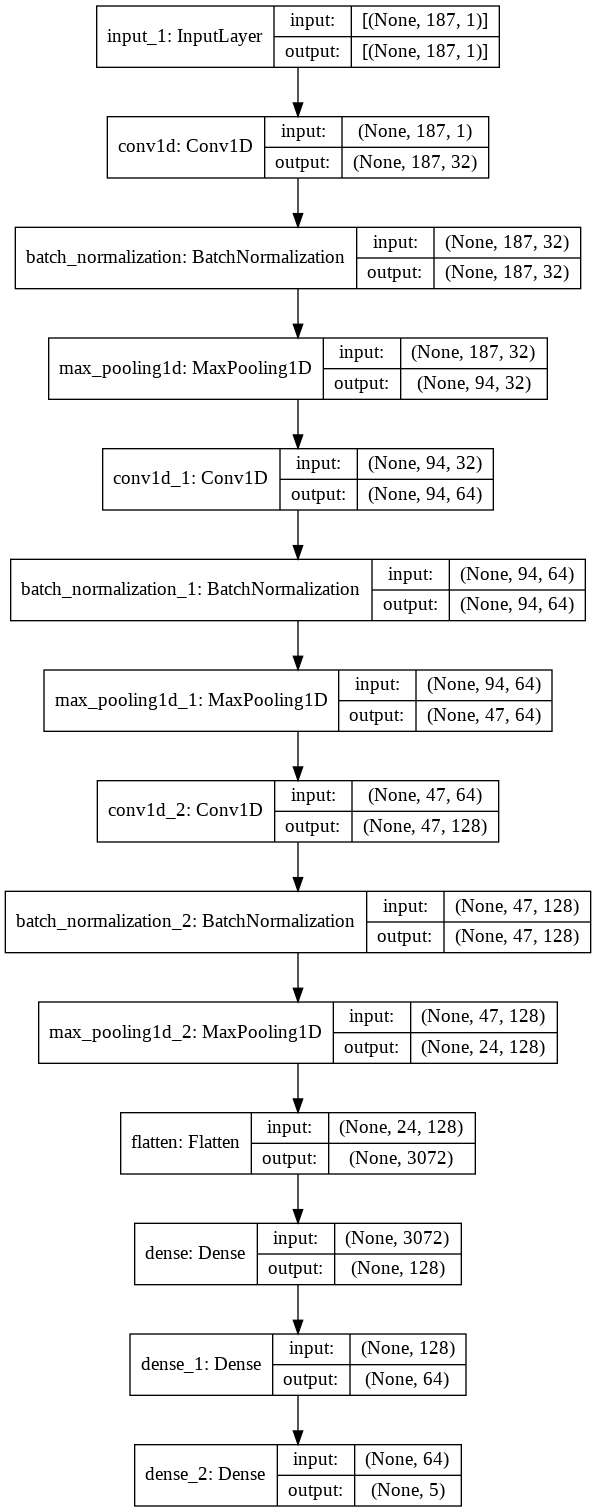

In [ ]:
import keras

# plot the model architecture
keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
)


In [ ]:
earlystopper = EarlyStopping(patience=5, verbose=1)
callbacks_list = [earlystopper]

In [ ]:
model.fit(train_x,train_y,epochs=20,verbose=1,shuffle=True,validation_split=.1)

Epoch 1/20
2110/2110 [==============================] - 51s 10ms/step - loss: 0.3598 - accuracy: 0.8734 - val_loss: 0.0396 - val_accuracy: 0.9892
Epoch 2/20
2110/2110 [==============================] - 19s 9ms/step - loss: 0.1007 - accuracy: 0.9648 - val_loss: 0.1933 - val_accuracy: 0.9477
Epoch 3/20
2110/2110 [==============================] - 19s 9ms/step - loss: 0.0712 - accuracy: 0.9771 - val_loss: 0.0217 - val_accuracy: 0.9936
Epoch 4/20
2110/2110 [==============================] - 19s 9ms/step - loss: 0.0555 - accuracy: 0.9825 - val_loss: 0.0077 - val_accuracy: 0.9987
Epoch 5/20
2110/2110 [==============================] - 19s 9ms/step - loss: 0.0413 - accuracy: 0.9864 - val_loss: 0.0287 - val_accuracy: 0.9931
Epoch 6/20
2110/2110 [==============================] - 19s 9ms/step - loss: 0.0353 - accuracy: 0.9885 - val_loss: 0.0593 - val_accuracy: 0.9840
Epoch 7/20
2110/2110 [==============================] - 19s 9ms/step - loss: 0.0289 - accuracy: 0.9901 - val_loss: 0.0202 - val_a

In [ ]:
model.evaluate(test_x, test_y)

685/685 [==============================] - 3s 4ms/step - loss: 0.1691 - accuracy: 0.9762


[0.16910380125045776, 0.976155698299408]

In [ ]:
pred=model.predict(test_x)

In [ ]:
pred

array([[1.0000000e+00, 1.4650550e-12, 7.2175616e-14, 5.6455909e-19,
        5.7060941e-16],
       [9.9990201e-01, 9.7480915e-05, 1.7191053e-07, 6.8855610e-09,
        3.8267353e-07],
       [1.0000000e+00, 7.0293971e-13, 1.5414910e-16, 1.1978500e-12,
        1.5822844e-23],
       ...,
       [6.1032733e-25, 2.2568250e-19, 6.5478595e-24, 6.3071069e-33,
        1.0000000e+00],
       [8.5657525e-26, 1.5367249e-22, 4.9356562e-29, 9.1815588e-31,
        1.0000000e+00],
       [4.3423396e-32, 4.1741768e-22, 1.9485189e-28, 1.2505809e-26,
        1.0000000e+00]], dtype=float32)

In [ ]:
yhat = np.argmax(pred, axis = 1)
yhat

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
test_y_noncat=mit_testdf['187'].astype('int')

In [ ]:
classification_report(test_y_noncat,yhat)

'              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.99     18118\n           1       0.68      0.87      0.76       556\n           2       0.93      0.96      0.94      1448\n           3       0.69      0.86      0.77       162\n           4       0.98      0.99      0.99      1608\n\n    accuracy                           0.98     21892\n   macro avg       0.86      0.93      0.89     21892\nweighted avg       0.98      0.98      0.98     21892\n'

```
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     18118
           1       0.68      0.87      0.76       556
           2       0.93      0.96      0.94      1448
           3       0.69      0.86      0.77       162
           4       0.98      0.99      0.99      1608

    accuracy                           0.98     21892
   macro avg       0.86      0.93      0.89     21892
weighted avg       0.98      0.98      0.98     21892
```


